In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/ASUS/OneDrive/Documents/data science/DS Assignments/Random forest/Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Data Preprocessing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.shape

(400, 11)

<Axes: xlabel='Education', ylabel='count'>

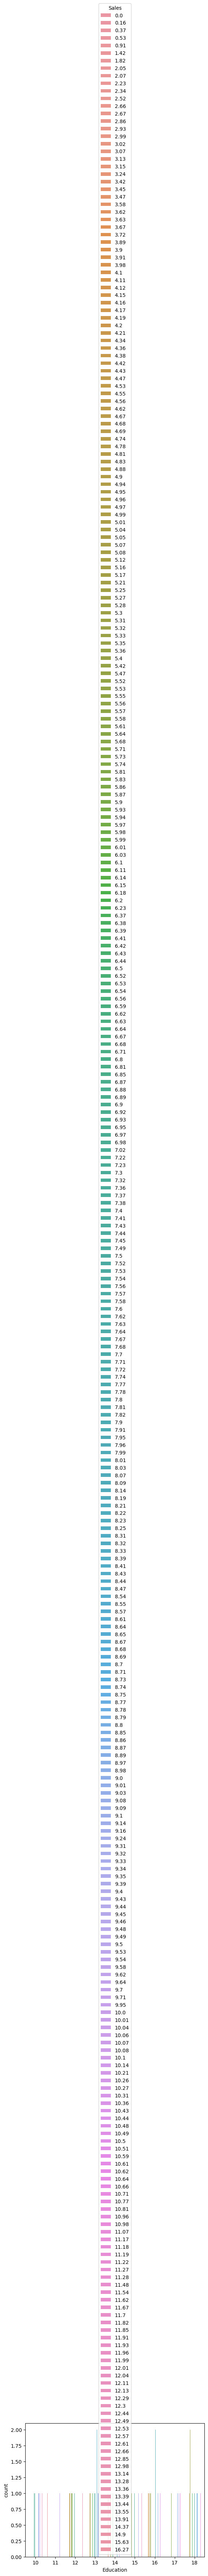

In [5]:
import seaborn as sns
sns.countplot(x = df["Education"],hue = df["Sales"])

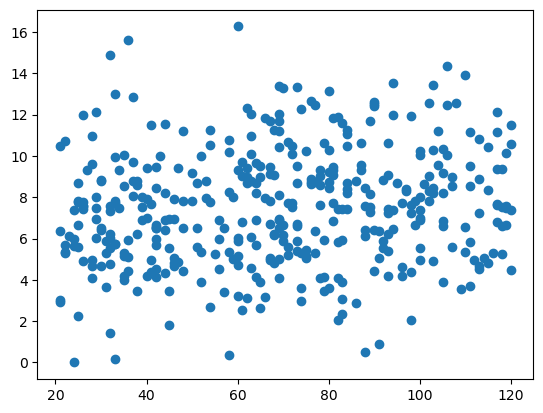

In [6]:
import matplotlib.pyplot as plt
y = df["Sales"]
x=df["Income"]
plt.scatter(x,y)

<Axes: xlabel='Urban', ylabel='count'>

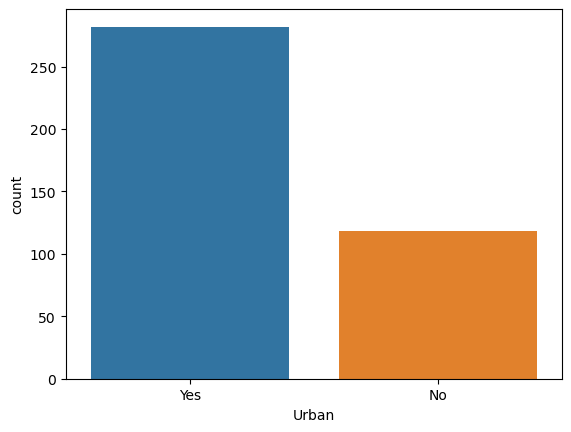

In [24]:
import seaborn as sns
sns.countplot(x = df["Urban"])

<Axes: xlabel='US', ylabel='count'>

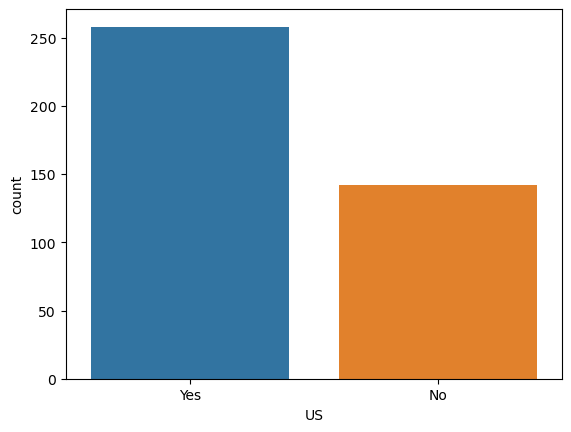

In [25]:
import seaborn as sns
sns.countplot(x = df["US"])

In [9]:
df.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19788\173579461.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


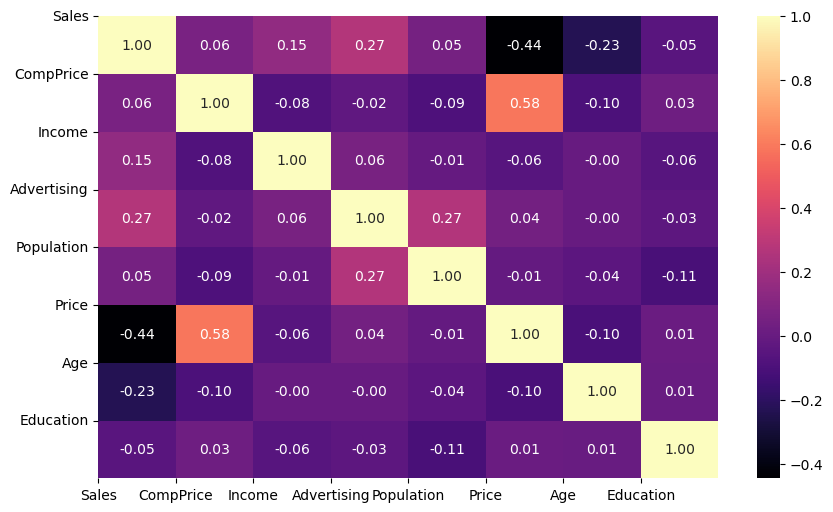

In [26]:
# Correlation analysis for data
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()


In [11]:
sales_val = []
for value in df["Sales"]:
    if value>=7.49:
        sales_val.append("High")
    else:
        sales_val.append("low")
df["Sales_val"]    = sales_val

## Data Transformation

In [12]:
import pandas as pd
import warnings
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import warnings
with warnings.catch_warnings():
    # Setting values in-place is fine, ignore the warning in Pandas >= 1.5.0
    # This can be removed, if Pandas 1.5.0 does not need to be supported any longer.
    # See also: https://stackoverflow.com/q/74057367/859591
    warnings.filterwarnings(
        "ignore",
        category=FutureWarning,
        message=(
            ".*will attempt to set the values inplace instead of always setting a new array. "
            "To retain the old behavior, use either.*"
        ),
    )
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat = df[df.columns[[6,9,10]]]
df_cat.iloc[:,0] = le.fit_transform(df_cat.iloc[:,0])
df_cat.iloc[:,1] = le.fit_transform(df_cat.iloc[:,1])
df_cat.iloc[:,2] = le.fit_transform(df_cat.iloc[:,2])
df_cat

,ShelveLoc,Urban,US
0,0,1,1
1,1,1,1
2,2,1,1
3,2,1,1
4,0,1,0
...,...,...,...
395,1,1,1
396,2,0,1
397,2,1,1
398,0,1,1


In [13]:
df_cont = df.drop(df.columns[[0,6,9,10,11]],axis =1)
df_cont

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,138,73,11,276,120,42,17
1,111,48,16,260,83,65,10
2,113,35,10,269,80,59,12
3,117,100,4,466,97,55,14
4,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14
396,139,23,3,37,120,55,11
397,162,26,12,368,159,40,18
398,100,79,7,284,95,50,12


In [14]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss = ss.fit_transform(df_cont)
ssx = pd.DataFrame(ss)
ssx.columns = list(df_cont)
ssx

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872
...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,0.038208
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,-1.108033
397,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,1.566529
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,-0.725953


In [15]:
df1 = pd.concat([ssx,df_cat,df["Sales_val"]],axis =1)
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Sales_val
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449,0,1,1,High
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113,1,1,1,High
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953,2,1,1,High
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208,2,1,1,low
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872,0,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,0.038208,1,1,1,High
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,-1.108033,2,0,1,low
397,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,1.566529,2,1,1,low
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,-0.725953,0,1,1,low


In [16]:
x = df1.iloc[:,0:10]
y= df1["Sales_val"]
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449,0,1,1
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113,1,1,1
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953,2,1,1
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208,2,1,1
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872,0,1,0


## Data Partition

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8)

## Random Forest Classification

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth =5,n_estimators = 100,max_samples = 0.6,max_features = 0.7,random_state=123)
rfc.fit(x_train,y_train)
y_pred_train = rfc.predict(x_train)
print(y_pred_train)
y_pred_test = rfc.predict(x_test)
print(y_pred_test)

['High' 'low' 'low' 'High' 'High' 'High' 'High' 'low' 'High' 'High' 'High'
 'High' 'High' 'High' 'low' 'low' 'High' 'High' 'High' 'low' 'low' 'low'
 'High' 'low' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'low' 'low' 'High' 'low' 'low' 'High' 'low' 'low' 'High' 'low' 'High'
 'low' 'low' 'High' 'low' 'High' 'low' 'High' 'low' 'High' 'High' 'low'
 'low' 'low' 'High' 'High' 'low' 'High' 'High' 'High' 'High' 'High' 'High'
 'low' 'low' 'High' 'High' 'High' 'low' 'High' 'low' 'High' 'low' 'low'
 'High' 'High' 'low' 'low' 'low' 'low' 'low' 'low' 'High' 'low' 'High'
 'High' 'low' 'low' 'low' 'High' 'High' 'low' 'High' 'low' 'low' 'low'
 'High' 'low' 'High' 'low' 'High' 'High' 'High' 'High' 'low' 'low' 'low'
 'low' 'High' 'High' 'High' 'High' 'High' 'low' 'low' 'low' 'low' 'High'
 'low' 'low' 'High' 'High' 'low' 'low' 'low' 'low' 'High' 'low' 'High'
 'low' 'low' 'High' 'low' 'High' 'low' 'low' 'High' 'low' 'High' 'High'
 'High' 'High' 'High' 'low' 'High' 'High' 'low' 'High' 'High'

## Accuracy_Score Of Random Forest Classifiaction

In [19]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_train,y_pred_train)
print("The training accuracy score is:",acc1.round(3))
acc2 = accuracy_score(y_test,y_pred_test)
print("The testing accuracy score is:",acc2.round(3))
print("The Variance between train and test data is:",acc1-acc2)

The training accuracy score is: 0.947
The testing accuracy score is: 0.85
The Variance between train and test data is: 0.09687500000000004


## Ada Boost Classifier 

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ABR = AdaBoostClassifier(base_estimator=RandomForestClassifier(),
                        n_estimators=250,
                        learning_rate=2)

ABR.fit(x_train,y_train)
y_pred_train = ABR.predict(x_train) 
y_pred_test = ABR.predict(x_test) 
y_pred_train


F:\ANACONDA SABA\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array(['High', 'low', 'High', 'low', 'low', 'low', 'low', 'High', 'High',
       'High', 'High', 'low', 'High', 'High', 'low', 'High', 'low',
       'High', 'low', 'low', 'low', 'High', 'low', 'low', 'low', 'High',
       'low', 'low', 'low', 'High', 'High', 'High', 'High', 'low', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'low', 'low',
       'low', 'low', 'High', 'High', 'low', 'High', 'High', 'low', 'High',
       'low', 'High', 'low', 'low', 'High', 'low', 'High', 'low', 'low',
       'low', 'High', 'low', 'low', 'low', 'High', 'High', 'High', 'High',
       'low', 'low', 'low', 'High', 'High', 'High', 'low', 'High', 'High',
       'High', 'High', 'low', 'High', 'High', 'High', 'low', 'High',
       'High', 'High', 'low', 'High', 'High', 'High', 'low', 'High',
       'High', 'High', 'High', 'High', 'low', 'High', 'low', 'low',
       'High', 'High', 'High', 'High', 'low', 'low', 'low', 'High',
       'High', 'low', 'High', 'low', 'High', 'low', 'High', 'High', '

In [21]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_train,y_pred_train)
print("The training accuracy score is:",acc1.round(3))
acc2 = accuracy_score(y_test,y_pred_test)
print("The testing accuracy score is:",acc2.round(3))
print("The Variance between train and test data is:",acc1-acc2)

The training accuracy score is: 1.0
The testing accuracy score is: 0.838
The Variance between train and test data is: 0.16249999999999998


## GradientBoosting Classifier 

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth = 5,n_estimators = 100,learning_rate = 0.01)
gbc.fit(x_train,y_train)
y_pred_train = gbc.predict(x_train) 
y_pred_test = gbc.predict(x_test) 

In [27]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_train,y_pred_train)
print("The training accuracy score is:",acc1.round(3))
acc2 = accuracy_score(y_test,y_pred_test)
print("The testing accuracy score is:",acc2.round(3))
print("The Variance between train and test data is:",acc1-acc2)

The training accuracy score is: 0.981
The testing accuracy score is: 0.838
The Variance between train and test data is: 0.14374999999999993


## Feature Extraction

In [29]:
for feature in zip(x, rfc.feature_importances_):
    print(feature)

('CompPrice', 0.14581139824591838)
('Income', 0.0762265651552267)
('Advertising', 0.09799580584188253)
('Population', 0.053260499851608994)
('Price', 0.3275300997233754)
('Age', 0.11408076933505434)
('Education', 0.025634311226594902)
('ShelveLoc', 0.1473442213924396)
('Urban', 0.005453840437681794)
('US', 0.006662488790217359)


In [53]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rfc, threshold=0.1)

# Train the selector
sfm.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=5, max_features=0.7,
                                                 max_samples=0.6,
                                                 random_state=123),
                threshold=0.1)

In [54]:
for index in sfm.get_support(indices=True):
    print(index)


0
2
3
4
5


### The important feature are Compprice,Advertising,Population,Price,Age when threshold value is 0.1 

In [55]:
x = df1[df1.columns[[0,2,3,4,5,]]]
x

,CompPrice,Advertising,Population,Price,Age
0,0.850455,0.657177,0.075819,0.177823,-0.699782
1,-0.912484,1.409957,-0.032882,-1.386854,0.721723
2,-0.781896,0.506621,0.028262,-1.513719,0.350895
3,-0.520720,-0.396715,1.366649,-0.794814,0.103677
4,1.046337,-0.547271,0.510625,0.516132,-0.947000
...,...,...,...,...,...
395,0.850455,1.560513,-0.420131,0.516132,-1.256023
396,0.915749,-0.547271,-1.547909,0.177823,0.103677
397,2.417512,0.807733,0.700853,1.827078,-0.823391
398,-1.630719,0.054953,0.130170,-0.879391,-0.205346


In [56]:
y = df1["Sales_val"]

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8)

### Random Forest Classifier with Selected Features

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth =5,n_estimators = 100,max_samples = 0.6,max_features = 0.7,random_state=123)
rfc.fit(x_train,y_train)
y_pred_train = rfc.predict(x_train)
print(y_pred_train)
y_pred_test = rfc.predict(x_test)
print(y_pred_test)

['High' 'High' 'High' 'low' 'low' 'low' 'low' 'High' 'High' 'High' 'High'
 'low' 'low' 'High' 'low' 'High' 'low' 'High' 'low' 'low' 'low' 'High'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'High' 'High' 'High' 'High'
 'low' 'High' 'High' 'low' 'High' 'High' 'High' 'High' 'low' 'low' 'low'
 'low' 'High' 'High' 'High' 'High' 'low' 'low' 'High' 'low' 'High' 'low'
 'low' 'High' 'low' 'High' 'low' 'low' 'low' 'High' 'High' 'low' 'low'
 'High' 'low' 'low' 'High' 'low' 'low' 'low' 'High' 'High' 'High' 'low'
 'High' 'High' 'High' 'High' 'low' 'High' 'High' 'High' 'low' 'High'
 'High' 'High' 'low' 'High' 'High' 'High' 'low' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'low' 'low' 'High' 'High' 'High' 'High' 'low'
 'low' 'low' 'High' 'High' 'low' 'High' 'High' 'High' 'low' 'High' 'High'
 'low' 'low' 'low' 'low' 'High' 'low' 'low' 'low' 'High' 'low' 'High'
 'low' 'low' 'low' 'low' 'low' 'low' 'High' 'High' 'High' 'low' 'low'
 'High' 'low' 'High' 'low' 'low' 'low' 'High' 'low' 'High' 'High' 'H

In [59]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_train,y_pred_train)
print("The training accuracy score is:",acc1.round(3))
acc2 = accuracy_score(y_test,y_pred_test)
print("The testing accuracy score is:",acc2.round(3))
print("The Variance between train and test data is:",acc1-acc2)

The training accuracy score is: 0.878
The testing accuracy score is: 0.812
The Variance between train and test data is: 0.06562500000000004


## From above feature extraction the variance between the accuracy score has been improved to 0.065 as before feature extraction the variance was 0.14.